In [33]:
# Import the dependencies.
import pandas as pd
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key from config.py file.
from config import weather_api_key
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create a set of random latitude and longitude combinations. Use zip() to pair them.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates= list(lat_lngs)

In [11]:
# Show the coordinates
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

52.001421408015375 152.9241121246303
-73.47497242293154 143.75343690958988
80.707376566709 -31.935141871309042
68.22750430173252 65.89614304342302
-66.52184709608949 42.09065810615493
-5.706750203279924 132.1711352129251
-89.97097388581952 -158.5569395067447
23.516849541500008 -107.3229197393857
56.01146671094605 104.19362572130478
89.32753798137159 122.93827374066586
-88.15581325507726 -157.14748671193297
-5.61700961744755 -155.0473453028627
-70.5156318944659 -152.43372401911412
-42.03452423904906 133.53515730993507
25.749474433467853 -176.84731631025676
44.271646250011344 16.329781226826583
-83.27859436725194 -30.916311540747245
54.23789241643814 170.74427299987963
57.33860165151205 -17.438660694552112
-49.88168342655335 -18.362107802525344
-52.76581892675384 -162.853889043349
64.16023146901543 -36.334318811671125
65.24398846291803 153.03424330713398
84.18470168572358 -99.30734762927283
-47.43458268253542 176.9559410307623
-52.434160333519245 -117.74082976497372
89.82960979372044 -16

70.30578772839607 -32.3275594681333
21.55091842231535 177.07843339429922
-38.0784476271034 153.12069426916827
73.7112142881538 -69.38395177638765
-78.68456359990145 81.02892374708784
-12.198465732839594 -75.80303011289554
-16.76370691316643 -23.791609310018913
-0.03718485715360487 -57.05693209512317
-6.721932939746921 -30.41656920659028
65.65119205186488 -91.44529452422073
-41.44806144257174 79.83698806456488
67.0555303987511 -119.31088702093847
-64.32142976288338 -101.64286297016058
-49.68512737209897 103.77327736642883
-31.952781185249577 -40.98341182180508
-70.3317413977944 94.6464995779532
-53.77024388427523 124.32864337923445
46.152261366221126 32.293818459610264
-47.21623752112957 -142.92742221546004
53.27579876698434 148.5222780305811
76.42020178148186 -52.353674349047054
37.19583745991018 -28.672674750065767
42.817524284394494 -174.20131249523124
13.174664743926002 155.56501590470293
-21.843333632033932 -113.63699483987017
3.4757816827753913 -88.77559490220503
31.07619256209493

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


615

In [13]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # % is modulo: the remainder from the division of the first argument to the second
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
   
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | oktyabrskiy
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | kharp
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | la cruz
Processing Record 9 of Set 1 | shestakovo
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | bosansko grahovo
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | zyryanka
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | christchurch
Processing

Processing Record 36 of Set 4 | san patricio
Processing Record 37 of Set 4 | lorengau
Processing Record 38 of Set 4 | ambikapur
Processing Record 39 of Set 4 | lufilufi
Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | ishigaki
Processing Record 42 of Set 4 | inhambane
Processing Record 43 of Set 4 | faizabad
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | sosnovo-ozerskoye
Processing Record 46 of Set 4 | saint-francois
Processing Record 47 of Set 4 | buala
Processing Record 48 of Set 4 | salekhard
Processing Record 49 of Set 4 | moindou
Processing Record 50 of Set 4 | portland
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | sorland
Processing Record 3 of Set 5 | meadow lake
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | awbari
Processing Record 6 of Set 5 | homer
Processing Record 7 of Set 5 | lasa
Processing Record 8 of Set 5 | grindavik
Processing Record 9 of Set 5 | collie
Processi

City not found. Skipping...
Processing Record 31 of Set 8 | gizo
Processing Record 32 of Set 8 | conde
Processing Record 33 of Set 8 | westport
Processing Record 34 of Set 8 | bronnoysund
Processing Record 35 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 36 of Set 8 | krasnoselkup
Processing Record 37 of Set 8 | along
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | tecoanapa
Processing Record 40 of Set 8 | ambilobe
Processing Record 41 of Set 8 | huanuco
Processing Record 42 of Set 8 | lakheri
Processing Record 43 of Set 8 | ranong
Processing Record 44 of Set 8 | asyut
Processing Record 45 of Set 8 | black diamond
Processing Record 46 of Set 8 | biak
Processing Record 47 of Set 8 | constitucion
Processing Record 48 of Set 8 | kloulklubed
Processing Record 49 of Set 8 | xining
Processing Record 50 of Set 8 | pangoa
Processing Record 1 of Set 9 | nago
Processing Record 2 of Set 9 | kandrian
Processing Record 3 of Set 9 | manado
Processing Recor

Processing Record 23 of Set 12 | henties bay
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | pathein
Processing Record 26 of Set 12 | aluksne
Processing Record 27 of Set 12 | mastic beach
Processing Record 28 of Set 12 | te anau
Processing Record 29 of Set 12 | povenets
Processing Record 30 of Set 12 | labutta
City not found. Skipping...
Processing Record 31 of Set 12 | vyartsilya
Processing Record 32 of Set 12 | hofn
Processing Record 33 of Set 12 | cooma
Processing Record 34 of Set 12 | piacabucu
Processing Record 35 of Set 12 | viedma
Processing Record 36 of Set 12 | derzhavinsk
Processing Record 37 of Set 12 | malusac
Processing Record 38 of Set 12 | vuktyl
Processing Record 39 of Set 12 | bilma
Processing Record 40 of Set 12 | mathathane
Processing Record 41 of Set 12 | camabatela
Processing Record 42 of Set 12 | antalaha
Processing Record 43 of Set 12 | ahumada
City not found. Skipping...
Processing Record 44 of Set 12 | kosa
Processing Record 45 of Se

In [15]:
# Determine length of city_data.  Needs to be over 500
len(city_data)

570

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oktyabrskiy,54.48,53.47,62.42,92,3,5.57,RU,2020-07-11 21:42:28
1,Hobart,-42.88,147.33,46.00,93,75,5.82,AU,2020-07-11 21:45:04
2,Kharp,66.80,65.81,53.46,88,100,8.21,RU,2020-07-11 21:45:04
3,Port Alfred,-33.59,26.89,52.00,77,42,5.01,ZA,2020-07-11 21:45:04
4,Tual,-5.67,132.75,79.48,83,84,19.93,ID,2020-07-11 21:45:04
5,Mataura,-46.19,168.86,44.15,93,69,3.31,NZ,2020-07-11 21:45:04
6,La Cruz,23.92,-106.90,93.00,66,0,8.99,MX,2020-07-11 21:45:04
7,Shestakovo,56.49,103.96,56.03,75,92,2.48,RU,2020-07-11 21:45:04
8,Tiksi,71.69,128.87,49.23,72,100,7.23,RU,2020-07-11 21:45:05
9,Faanui,-16.48,-151.75,78.28,76,23,17.90,PF,2020-07-11 21:43:01


In [17]:
# Reorder columns for asthetics
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oktyabrskiy,RU,2020-07-11 21:42:28,54.48,53.47,62.42,92,3,5.57
1,Hobart,AU,2020-07-11 21:45:04,-42.88,147.33,46.00,93,75,5.82
2,Kharp,RU,2020-07-11 21:45:04,66.80,65.81,53.46,88,100,8.21
3,Port Alfred,ZA,2020-07-11 21:45:04,-33.59,26.89,52.00,77,42,5.01
4,Tual,ID,2020-07-11 21:45:04,-5.67,132.75,79.48,83,84,19.93
5,Mataura,NZ,2020-07-11 21:45:04,-46.19,168.86,44.15,93,69,3.31
6,La Cruz,MX,2020-07-11 21:45:04,23.92,-106.90,93.00,66,0,8.99
7,Shestakovo,RU,2020-07-11 21:45:04,56.49,103.96,56.03,75,92,2.48
8,Tiksi,RU,2020-07-11 21:45:05,71.69,128.87,49.23,72,100,7.23
9,Faanui,PF,2020-07-11 21:43:01,-16.48,-151.75,78.28,76,23,17.90


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Begin creating a scatter plot of max temp vs latitude
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [20]:
# Get today's date in seconds.
today = time.time()
today

1594504180.3480365

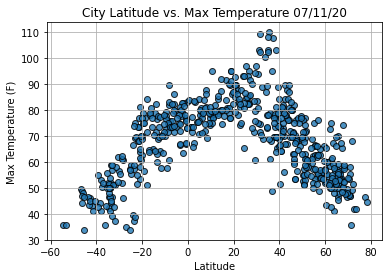

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

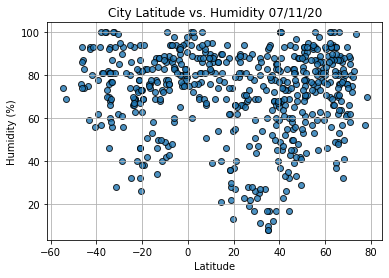

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


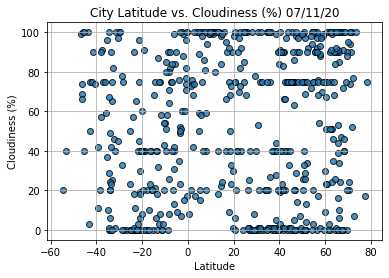

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


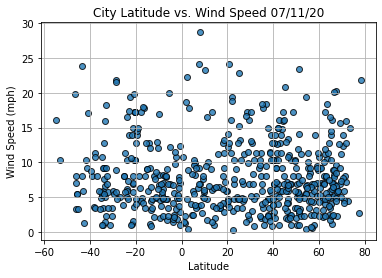

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [27]:
# Begin Linear Regression
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(r_value)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13] 
index13

City                      Ushuaia
Country                        AR
Date          2020-07-11 21:41:01
Lat                         -54.8
Lng                         -68.3
Max Temp                     35.6
Humidity                       74
Cloudiness                     20
Wind Speed                  16.11
Name: 13, dtype: object

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oktyabrskiy,RU,2020-07-11 21:42:28,54.48,53.47,62.42,92,3,5.57
1,Hobart,AU,2020-07-11 21:45:04,-42.88,147.33,46.00,93,75,5.82
2,Kharp,RU,2020-07-11 21:45:04,66.80,65.81,53.46,88,100,8.21
3,Port Alfred,ZA,2020-07-11 21:45:04,-33.59,26.89,52.00,77,42,5.01
4,Tual,ID,2020-07-11 21:45:04,-5.67,132.75,79.48,83,84,19.93


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


-0.7099329220321182


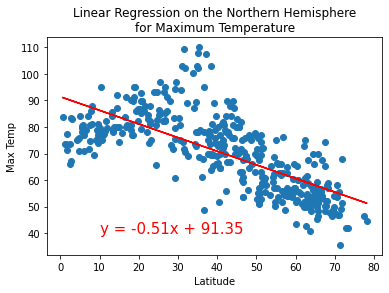

In [34]:
# Linear regression on the Northern Hemisphere: Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values
                       ,'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature'
                       , 'Max Temp'
                       ,(10,40))

0.8186093141711521


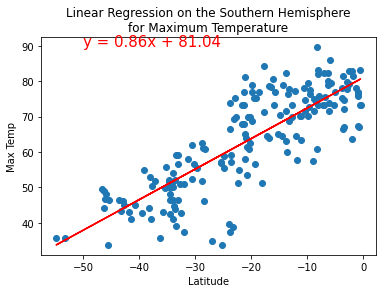

In [35]:
# Linear regression on the Southern Hemisphere: Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values
                       , 'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature'
                       , 'Max Temp'
                       ,(-50,90))

0.0730788137892149


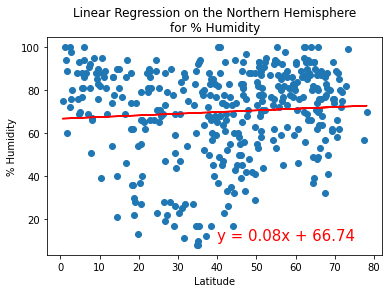

In [36]:
# Linear regression on the Northern Hemisphere: Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values
                       , 'Linear Regression on the Northern Hemisphere\nfor % Humidity'
                       , '% Humidity'
                       ,(40,10))


0.023607266675873293


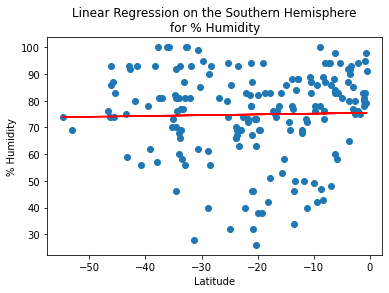

In [37]:
# Linear regression on the Southern Hemisphere: Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values
                       , 'Linear Regression on the Southern Hemisphere\nfor % Humidity'
                       , '% Humidity'
                       ,(-50,20))

-0.050313289695094104


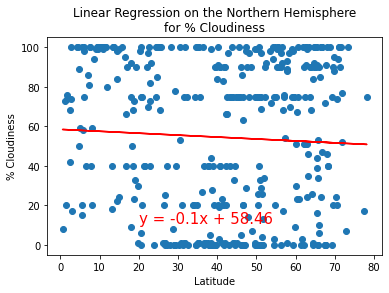

In [38]:
# Linear regression on the Northern Hemisphere: Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values
                       , 'Linear Regression on the Northern Hemisphere\nfor % Cloudiness'
                       , '% Cloudiness'
                       ,(20,11))


0.02706950815893665


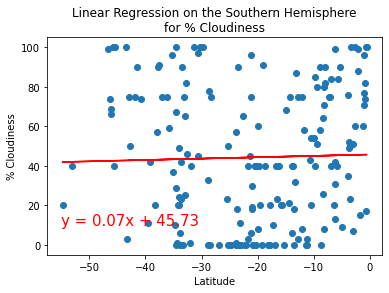

In [39]:
# Linear regression on the Southern Hemisphere: Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values
                       , 'Linear Regression on the Southern Hemisphere\nfor % Cloudiness'
                       , '% Cloudiness'
                       ,(-55,10))

-0.02913712721048509


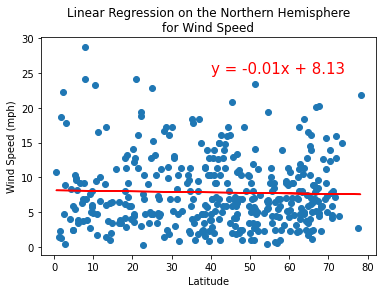

In [40]:
# Linear regression on the Northern Hemisphere: Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values
                       , 'Linear Regression on the Northern Hemisphere\nfor Wind Speed'
                       , 'Wind Speed (mph)'
                       ,(40,25))

-0.1442657901663027


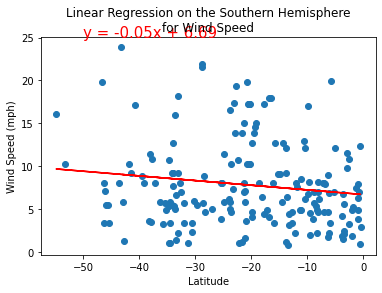

In [41]:
# Linear regression on the Southern Hemisphere: Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values
                       , 'Linear Regression on the Southern Hemisphere\nfor Wind Speed'
                       , 'Wind Speed (mph)'
                       ,(-50,25))